# ทำนายคะแนนต่ำสุด วิศวะ จุฬา TCAS รอบ 3 (รุ่น Dek63)
_โดย พี่เกรท ออนดีมานด์_

โจทย์: ทำนายคะแนนต่ำสุด สอบติดวิศวะ จุฬา TCAS รอบ 3 ด้วย Machine Learning Models

> **Disclaimer:** การวิเคราะห์นี้ ทำด้วยข้อมูลเท่าที่หาได้จากเว็บไซต์ สทศ ซึ่งมีข้อมูลย้อนหลังถึงปี 2553 ที่เริ่มมีการสอบ GAT/PAT อีกทั้งเราไม่เอาคะแนนปี 53-54 มาคิดเพราะเกณฑ์การรับมี GPAX ด้วย ต่างจากปี 55 เป็นต้นไป ที่ใช้คะแนน GAT/PAT เพียงอย่างเดียว ดังนั้น จำนวนจุดของข้อมูลจึงมีจำกัดมากๆ อาจทำให้คะแนนที่ทำนายออกมา มีความแม่นยำที่ลดลง อย่างไรก็ตาม พี่จะทำนายแล้วระบุความคลาดเคลื่อนเอาไว้ให้ด้วยครับ

## TL;DR

จากการทำนายด้วยโมเดล Linear Regression พบว่า คะแนนทำนายต่ำสุดเพื่อสอบติด วิศวะ จุฬา TCAS รอบ 3 ปี 2563 โดยใช้ข้อมูลปี 2555-2562 คือ

> ### 19,334 ± 237 คะแนน

ข้อสรุปจากการวิเคราะห์
- คะแนนปีนี้ มีแนวโน้ม **เฟ้อ**มากกว่าทุกปีที่ผ่านมา (สังเกตเบื้องต้นได้จากจำนวนคนทำ PAT1 ได้เกิน 120 ที่เพิ่มขึ้นจากปีก่อนๆ ถึงเท่าตัว)
- คะแนนปีนี้ มีแนวโน้มใกล้เคียงคะแนนปี **2558** และ **2560**
- น้องที่มีคะแนนในช่วง 19,XXX มีสิทธิ์ลุ้นสอบติดนะครับ (แม้แต่หากน้องได้ 18,XXX ก็ควรลองยื่นเป็นอันดับ 1 ดูครับ)
- แต่พี่ขอย้ำอีกทีนะครับว่า คะแนนทำนายนี้ เป็นเพียงคะแนนทำนายเท่านั้น ทำให้อาจมีปัจจัยอื่นที่โมเดลไม่ได้คำนึงถึงครับ

ทั้งนี้ การเลือกคณะ พี่แนะนำให้น้องเลือกด้วยหลักการดังนี้นะครับ

- **อันดับ 1:** เลือกตามความอยากเลยโดยไม่ต้องแคร์คะแนนที่น้องได้ จะได้ไม่คาใจครับ
- **อันดับ 2-3:** คะแนนของน้อง อยู่ในช่วงค่าต่ำสุดที่สอบติดของ 3 ปีย้อนหลัง
- **อันดับ 4-5:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 1500 คะแนน (สเกลเต็ม 30000)
- **อันดับ 6:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 3000 คะแนน (สเกลเต็ม 30000)

และน้องสามารถวิเคราะห์คะแนนและดูสถิติเพิ่มเติม ได้ที่แอพพลิเคชั่น TCASter (https://tcaster.net/) หรือติดตามข่าวสารได้ที่ Facebook Fanpage (https://www.facebook.com/TCASterApp/) ครับ

แล้วก็ เดี๋ยวพี่จะวิเคราะห์คะแนน กสพท ให้ด้วย รอติดตามได้ทาง Instagram ของพี่ ที่ https://www.instagram.com/pgreatondemand นะครับ

ขอให้น้องๆ สอบติดได้ตามที่ตั้งใจไว้นะ :-)

## Data Import

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('engcuraw63_05.csv', index_col=0)

In [2]:
df.head()

,Round,CU_R3_Min,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,...,PAT1_210,PAT1_240,PAT1_270,PAT3_90,PAT3_120,PAT3_150,PAT3_180,PAT3_210,PAT3_240,PAT3_270
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,16465.0,800,284735,200693,39488,130.59,68.04,39.64,20.07,...,73,22,4,7622,2512,1097,505,176,28,0
2556,1,19100.0,800,323876,243834,51235,114.30,60.63,40.61,20.96,...,128,29,14,9958,4463,2305,1337,767,298,8
2557,1,18552.0,600,237419,173708,35302,143.58,61.60,57.40,24.13,...,98,25,8,11207,3976,1803,808,415,135,13
2558,1,19090.0,610,316791,239345,49776,131.97,63.81,51.56,18.85,...,42,18,3,11124,4429,2079,1193,686,330,35
2559,1,17510.0,610,324856,253213,57879,115.66,58.73,52.61,21.64,...,164,63,18,9171,2816,1340,683,330,82,5


In [3]:
X = df.drop('CU_R3_Min', axis=1)
y = df[['CU_R3_Min']]

In [4]:
X

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,PAT1_210,PAT1_240,PAT1_270,PAT3_90,PAT3_120,PAT3_150,PAT3_180,PAT3_210,PAT3_240,PAT3_270
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,73,22,4,7622,2512,1097,505,176,28,0
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,128,29,14,9958,4463,2305,1337,767,298,8
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,98,25,8,11207,3976,1803,808,415,135,13
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,42,18,3,11124,4429,2079,1193,686,330,35
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,164,63,18,9171,2816,1340,683,330,82,5
2560,1,590,289866,228522,50623,123.93,58.48,42.82,25.34,95.91,...,334,128,79,15502,4665,1858,932,563,199,24
2561,1,610,230566,177835,37347,144.65,67.82,48.45,26.13,92.32,...,243,113,36,7348,2944,1649,979,582,320,52
2562,1,430,215585,163251,34493,144.06,66.90,49.05,29.68,90.81,...,359,141,49,7708,2754,1270,730,429,129,4
2563,1,400,202341,150694,33147,147.50,63.43,62.90,38.08,98.21,...,937,677,375,9341,3381,1567,880,475,114,10


In [5]:
y

,CU_R3_Min
Year,
2555,16465.0
2556,19100.0
2557,18552.0
2558,19090.0
2559,17510.0
2560,18870.0
2561,18880.0
2562,18360.0
2563,NaN


# Exploratory Data Analysis

- ดูแนวโน้มค่าเฉลี่ยคะแนนรวมถ่วงน้ำหนักที่คิดจาก GAT 20%, PAT1 20% และ PAT3 60% ของปี 55-63 (ไม่เอาปี 53-54 เพราะใช้คนละเกณฑ์) เทียบคะแนนต่ำสุดที่ติดวิศวะ จุฬา TCAS รอบ 3 (รับตรง)
- วิเคราะห์คะแนนของคนที่ได้ GAT 150up, PAT1 Top 1500 และ PAT3 Top 1000 (สมมติฐานคะแนนของกลุ่มคนที่มีลุ้นสอบติดวิศวะ จุฬา)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## แนวโน้มค่าเฉลี่ยคะแนน

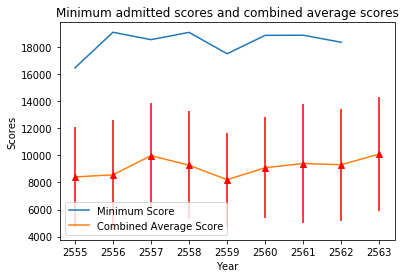

In [7]:
plt.plot(y.index, y.CU_R3_Min, y.index, X.Total_avg)
plt.errorbar(y.index, X.Total_avg, yerr=X.Total_std, fmt='r^')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['Minimum Score','Combined Average Score'])
plt.title('Minimum admitted scores and combined average scores')
plt.show()

เราจะเห็นว่า ค่าเฉลี่ยของคะแนน ไม่ใช่ตัวทำนายที่ดีนัก เพราะแนวโน้มไม่ได้สอดคล้องกับคะแนนต่ำสุดที่ติดวิศวะจุฬาจริง และยังมีส่วนเบี่ยงเบนมาตรฐานที่ใหญ่มากอีกด้วย

## แนวโน้มคะแนนของกลุ่มคะแนนมีโอกาสสอบติดจริง
สมมติฐาน: น้องที่จะสอบติดวิศวะจุฬา คือกลุ่มที่ได้คะแนนค่อนข้างสูง กล่าวคือ
- GAT > 150
- PAT1 Top 1500 และ Top 2000 (อาจมีหลายคน ไปยื่นหมอ)
- PAT3 Top 1000 และ Top 800

ดังนั้น เราจะเอาค่าสถิติของคนกลุ่มนี้ มาวิเคราะห์ดูแนวโน้ม

In [8]:
MAX_SCORE = 300
SCORE_BIN = 30

def get_top(X_range, exam_name, top_N=1000):
    ''' A method to get the (approximate) score of top_N'th student
    INPUT : X_range (DataFrame) - Score range dataframe of a single year
            exam_name (str) - name of interested exam
            top_N - the interested rank
    OUTPUT: top_N_score (float) - the score of rank top_N
    '''
    current_rank = 0
    current_range = MAX_SCORE - SCORE_BIN
    while True:
        N_stu = X_range[exam_name+'_'+str(current_range)] #Number of students in this score range
        if (current_rank + N_stu) < top_N:
            current_rank += N_stu
            current_range -= SCORE_BIN
        else:
            top_N_score = current_range + SCORE_BIN*((current_rank + N_stu) - top_N)/N_stu
            return top_N_score

In [9]:
X['PAT1_top1500'] = X.apply(lambda row: get_top(row, 'PAT1', top_N=1500), axis=1)
X['PAT3_top1000'] = X.apply(lambda row: get_top(row, 'PAT3', top_N=1000), axis=1)

In [10]:
X['PAT1_top2000'] = X.apply(lambda row: get_top(row, 'PAT1', top_N=2000), axis=1)
X['PAT3_top800'] = X.apply(lambda row: get_top(row, 'PAT3', top_N=800), axis=1)

In [11]:
X.head()

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,PAT3_120,PAT3_150,PAT3_180,PAT3_210,PAT3_240,PAT3_270,PAT1_top1500,PAT3_top1000,PAT1_top2000,PAT3_top800
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,2512,1097,505,176,28,0,134.681373,172.041933,122.426471,177.511395
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,4463,2305,1337,767,298,8,144.256541,212.855280,134.684110,220.677966
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,3976,1803,808,415,135,13,151.986755,193.774752,145.188363,201.200495
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,4429,2079,1193,686,330,35,127.267241,212.230321,118.688099,220.976676
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,2816,1340,683,330,82,5,152.142857,184.392387,144.111514,193.177160


In [12]:
def get_weighted_avg(X_range, exam_name, limit_score=150):
    ''' A method to get the weighted average score given a min score
    INPUT : X_range (DataFrame) - Score range dataframe of a single year
            exam_name (str) - - name of interested exam
            min_score (int) - the lower bound of interested range, MUST be in [90,120,150,180,210,240,270]
    OUTPUT: weighted_score (float) - the weighted score above the limit_score
            total_students (int) - number of students above the limit_score
    '''
    score_ranges = np.arange(limit_score, MAX_SCORE, SCORE_BIN).astype(int)
    grand_total = 0
    total_students = 0
    for current_range in score_ranges:
        grand_total += X_range[exam_name+'_'+str(current_range)]*(current_range + 0.5*SCORE_BIN)
        total_students += X_range[exam_name+'_'+str(current_range)]
    
    weighted_score = grand_total/total_students
    return weighted_score, int(total_students)

In [13]:
X['GAT_150up_avg'], X['GAT_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'GAT', limit_score=150), axis=1))
X['PAT1_120up_avg'], X['PAT1_120up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT1', limit_score=120), axis=1))
X['PAT3_150up_avg'], X['PAT3_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT3', limit_score=150), axis=1))

In [14]:
X['PAT1_150up_avg'], X['PAT1_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT1', limit_score=120), axis=1))

In [15]:
X

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,PAT1_top2000,PAT3_top800,GAT_150up_avg,GAT_150up_N,PAT1_120up_avg,PAT1_120up_N,PAT3_150up_avg,PAT3_150up_N,PAT1_150up_avg,PAT1_150up_N
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,122.426471,177.511395,199.344316,120889,154.051929,2099,180.631229,1806,154.051929,2099
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,134.684110,220.677966,195.170167,150911,155.784243,2767,189.159067,4715,155.784243,2767
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,145.188363,201.200495,219.482108,203643,150.913903,4251,184.801512,3174,150.913903,4251
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,118.688099,220.976676,199.157137,127061,150.631668,1781,190.641915,4323,150.631668,1781
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,144.111514,193.177160,190.702771,94540,155.196130,3773,184.782787,2440,155.196130,3773
2560,1,590,289866,228522,50623,123.93,58.48,42.82,25.34,95.91,...,155.500945,209.549356,188.008617,106760,164.699929,4199,188.078859,3576,164.699929,4199
2561,1,610,230566,177835,37347,144.65,67.82,48.45,26.13,92.32,...,149.209431,217.938144,197.270479,126568,160.024355,4106,192.730318,3582,160.024355,4106
2562,1,430,215585,163251,34493,144.06,66.90,49.05,29.68,90.81,...,165.914267,200.219178,204.802894,101468,161.184258,5590,188.313817,2562,161.184258,5590
2563,1,400,202341,150694,33147,147.50,63.43,62.90,38.08,98.21,...,209.788462,203.147727,198.195965,106259,173.112528,10273,186.785949,3046,173.112528,10273


เราจะดูคะแนนรวม 2 แบบ ว่าแบบไหนสอดคล้อง Trend คะแนนต่ำสุดที่ติดมากกว่า
- แบบ A: (20% GAT150up.avg + 20% PAT1top1500 + 60% PAT3top1000) \* 100 (เต็ม 30000)
- แบบ B: (20% GAT150up.avg + 20% PAT1.120up.avg + 60% PAT3.150up.avg) \* 100 (เต็ม 30000)
- แบบ C: (20% GAT150up.avg + 20% PAT1top2000 + 60% PAT3top800) \* 100 (เต็ม 30000)

In [16]:
X['Combined_A'] = (0.2*X['GAT_150up_avg'] + 0.2*X['PAT1_top1500'] + 0.6*X['PAT3_top1000'])*100
X['Combined_B'] = (0.2*X['GAT_150up_avg'] + 0.2*X['PAT1_120up_avg'] + 0.6*X['PAT3_150up_avg'])*100
X['Combined_C'] = (0.2*X['GAT_150up_avg'] + 0.2*X['PAT1_top2000'] + 0.6*X['PAT3_top800'])*100

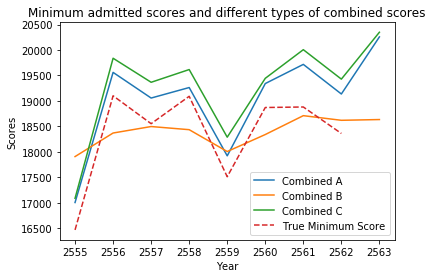

In [17]:
plt.plot(X.index, X.Combined_A, X.index, X.Combined_B, X.index, X.Combined_C)
plt.plot(X.index, y.CU_R3_Min, linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['Combined A','Combined B','Combined C','True Minimum Score'])
plt.title('Minimum admitted scores and different types of combined scores')
plt.show()

ข้อสังเกต
- การคิดด้วยค่าเฉลี่ยถ่วงน้ำหนักอย่างเดียว (แบบ B) แทบใช้ในการทำนายไม่ได้เลย
- การคิดด้วยแบบจำลอง A และ C ทำนาย "แนวโน้มการขึ้นลง" ได้ค่อนข้างตรงกับของจริง แปลว่ามีโอกาสสูงที่ปี 2563 คะแนนจะดีดตัวขึ้นมาจากปีที่แล้ว

แต่ทั้งนี้ เราจะลองสร้าง Learning Algorithms ขึ้นมาเพื่อทำนายคะแนนต่ำสุดในปีนี้

In [18]:
X.columns

Index(['Round', 'Quota', 'GAT_N', 'PAT1_N', 'PAT3_N', 'GAT_avg', 'GAT_std',
       'PAT1_avg', 'PAT1_std', 'PAT3_avg', 'PAT3_std', 'Total_avg',
       'Total_std', 'GAT_90', 'GAT_120', 'GAT_150', 'GAT_180', 'GAT_210',
       'GAT_240', 'GAT_270', 'PAT1_90', 'PAT1_120', 'PAT1_150', 'PAT1_180',
       'PAT1_210', 'PAT1_240', 'PAT1_270', 'PAT3_90', 'PAT3_120', 'PAT3_150',
       'PAT3_180', 'PAT3_210', 'PAT3_240', 'PAT3_270', 'PAT1_top1500',
       'PAT3_top1000', 'PAT1_top2000', 'PAT3_top800', 'GAT_150up_avg',
       'GAT_150up_N', 'PAT1_120up_avg', 'PAT1_120up_N', 'PAT3_150up_avg',
       'PAT3_150up_N', 'PAT1_150up_avg', 'PAT1_150up_N', 'Combined_A',
       'Combined_B', 'Combined_C'],
      dtype='object')

## Data Preprocessing and Feature Engineering
ในส่วนนี้ เราจะมาเตรียม data ให้พร้อมสำหรับโมเดล Machine Learning และเลือก Feature ที่คาดว่าจะทำให้ทำนายผลได้แม่นยำขึ้น

รายการ Features
- `PAT3_150up_N` จำนวนคนได้ PAT3 เกิน 150
- `Combined_A` คะแนน (0.2\*GAT_150up_avg + 0.2\*PAT1_top1500 + 0.6\*PAT3_top1000)\*100

In [19]:
selected_features = ['PAT3_150up_N', 'Combined_A']

In [20]:
X_selected = X[selected_features]

In [21]:
X_selected

,PAT3_150up_N,Combined_A
Year,,
2555,1806,17003.029721
2556,4715,19559.850972
2557,3174,19055.862416
2558,4323,19262.306812
2559,2440,17920.455761
2560,3576,19340.440407
2561,3582,19716.902848
2562,2562,19135.280911
2563,3046,20256.819020


In [22]:
X_standardized = (X_selected - X_selected.mean())/(X_selected.std())

In [23]:
X_standardized

,PAT3_150up_N,Combined_A
Year,,
2555,-1.565876,-2.056005
2556,1.594972,0.540152
2557,-0.079441,0.028410
2558,1.169034,0.238030
2559,-0.876987,-1.124465
2560,0.357363,0.317366
2561,0.363882,0.699620
2562,-0.744425,0.109050
2563,-0.218522,1.247843


In [24]:
X_train = X_standardized.drop([2563])
y_train = y.drop([2563])

X_test = X_standardized.loc[[2563]]

In [25]:
X_train

,PAT3_150up_N,Combined_A
Year,,
2555,-1.565876,-2.056005
2556,1.594972,0.540152
2557,-0.079441,0.028410
2558,1.169034,0.238030
2559,-0.876987,-1.124465
2560,0.357363,0.317366
2561,0.363882,0.699620
2562,-0.744425,0.109050


In [26]:
y_train

,CU_R3_Min
Year,
2555,16465.0
2556,19100.0
2557,18552.0
2558,19090.0
2559,17510.0
2560,18870.0
2561,18880.0
2562,18360.0


## Model Selection and Training
ต่อจากนี้ เราจะเริ่มทำการหาโมเดล Machine Learning ที่จะทำนายคะแนนต่ำสุดที่ติดวิศวะ จุฬา รอบ 3
โดยเบื้องต้น จะเน้นไปที่โมเดล Regression ดังนี้
- Linear Regression
- Random Forest Regressor
- AdaBoost Regressor

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

In [28]:
RF = RandomForestRegressor(random_state=42)
ADA = AdaBoostRegressor(random_state=42)
LR = LinearRegression()

models = [RF, ADA, LR]
model_names = ['Random Forest', 'AdaBoost', 'Linear Regression']

In [29]:
# Calculate the scores for all models using cross-validation method
n_models = len(models)
for i in range(0, n_models):
    model = models[i]
    model_name = model_names[i]
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring='neg_mean_absolute_error')
    mae = - scores.mean()
    print('The mean mae for {:<30} is {:>10.3f}'.format(model_name, mae))

The mean mae for Random Forest                  is    276.284
The mean mae for AdaBoost                       is    599.111
The mean mae for Linear Regression              is    236.805


พบว่า โมเดล Linear Regression แม่นยำสุด ดังนั้น เราจะลอง Train โมเดล Linear Regression ก่อน

### Linear Regression

In [30]:
LR_CV_results = cross_validate(LR, X_train, y_train, cv=3, scoring='neg_mean_absolute_error',
                               return_estimator=True)

In [31]:
LR_CV_results

{'fit_time': array([0.00203037, 0.00304079, 0.00499201]),
 'score_time': array([0.00120592, 0.00099468, 0.0010078 ]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([-226.06603553, -207.8639593 , -276.48645646])}

In [32]:
LR_model_CV = LR_CV_results['estimator']

In [33]:
LR_predictions = []
for estimator in LR_model_CV:
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    LR_predictions.append(np.append(train_preds,test_preds))    

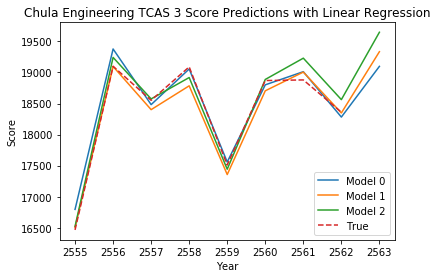

In [34]:
for i in range(len(LR_predictions)):
    plt.plot(np.arange(2555,2564), LR_predictions[i])
plt.plot(np.arange(2555,2563), y_train.values.ravel(), linestyle='dashed')
plt.xticks(np.arange(2555,2564))
plt.legend(['Model {}'.format(i) for i in range(len(LR_predictions))] + ['True'])
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Chula Engineering TCAS 3 Score Predictions with Linear Regression')
plt.show()

Model 1 มีคะแนนที่ดีที่สุด

In [35]:
print("คะแนนทำนายต่ำสุด วิศวะ จุฬา = {:.2f}".format(LR_predictions[1][-1]))

คะแนนทำนายต่ำสุด วิศวะ จุฬา = 19334.39


รายงานคะแนนทำนายดังนี้

> คะแนน Model 1 ± ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ของ 3 โมเดล

In [36]:
model1_score = LR_predictions[1][-1]
model_average_mae = LR_CV_results['test_score'].mean()
confidence_int = np.abs(model_average_mae)

print("คะแนนทำนายต่ำสุด วิศวะ จุฬา = {:.2f} ± {:.2f}".format(model1_score, confidence_int))

คะแนนทำนายต่ำสุด วิศวะ จุฬา = 19334.39 ± 236.81


ลองดูว่า สัมประสิทธิ์ของตัวแปรไหนบ้างที่มีความสำคัญต่อการทำนายคะแนน

In [37]:
coefficients = pd.Series(LR_model_CV[1].coef_[0], index=X_train.columns)

Text(0.5, 1.0, 'Feature importance using Linear Regression')

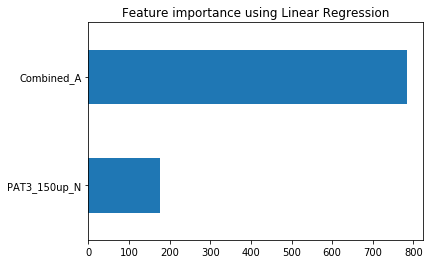

In [38]:
imp_coef = coefficients.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")

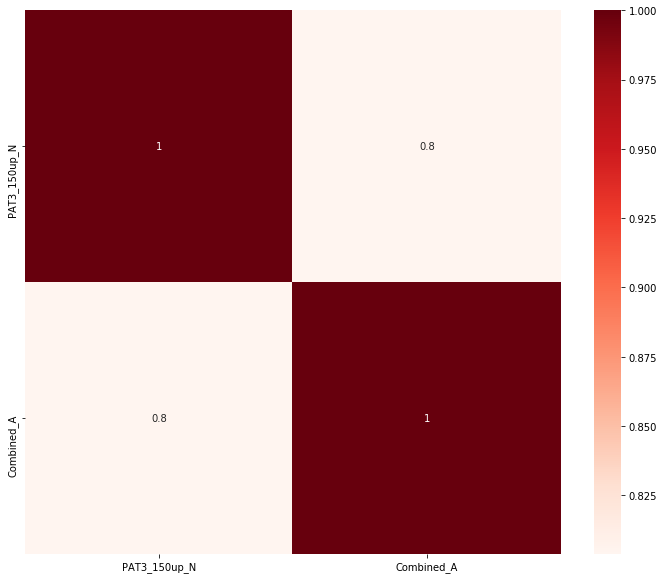

In [39]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Random Forest Regressor

In [40]:
def get_best_model(model, parameters):
    ''' Return the best tuned model with its mse score
    INPUT: model - untuned model
    parameters - dictionary of tuning hyper parameters
    OUTPUT: best_model - the best tuned model
    mse - model cv mse
    '''
    scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    grid_obj = GridSearchCV(model, parameters, scoring = scorer, cv=3)
    grid_fit = grid_obj.fit(X_train, y_train.values.ravel())
    best_model = grid_fit.best_estimator_
    mae = - grid_fit.best_score_
    
    return best_model, mae

In [41]:
parameters = {"bootstrap" : [True],
              "max_depth" : [2,5,7,10],
              "min_samples_leaf" : [1],
              "min_samples_split" : [2],
              "n_estimators": [200, 300, 400, 500, 700]}

RF_best_model, RF_best_mae = get_best_model(RF, parameters)
print(RF_best_model)
print("The mae for RF best model on training set is: {:.3f}".format(RF_best_mae))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
The mae for RF best model on training set is: 269.666


In [42]:
RF_CV_results = cross_validate(RF_best_model, X_train, y_train.values.ravel(), cv=3, scoring='neg_mean_absolute_error',
                               return_estimator=True)

In [43]:
RF_CV_results

{'fit_time': array([0.30341625, 0.28367686, 0.27568483]),
 'score_time': array([0.01460695, 0.01368546, 0.00710893]),
 'estimator': (RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=200, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False),
  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0

In [44]:
RF_model_CV = RF_CV_results['estimator']

In [45]:
RF_predictions = []
for estimator in RF_model_CV:
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    RF_predictions.append(np.append(train_preds,test_preds)) 

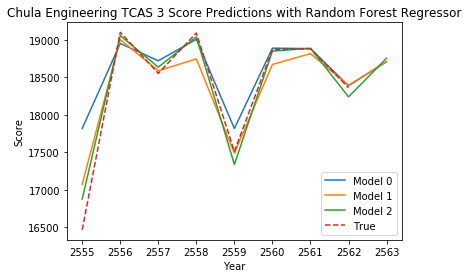

In [46]:
for i in range(len(RF_predictions)):
    plt.plot(np.arange(2555,2564), RF_predictions[i])
plt.plot(np.arange(2555,2563), y_train.values.ravel(), linestyle='dashed')
plt.xticks(np.arange(2555,2564))
plt.legend(['Model {}'.format(i) for i in range(len(RF_predictions))] + ['True'])
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Chula Engineering TCAS 3 Score Predictions with Random Forest Regressor')
plt.show()

โมเดลที่ 2 สี mae score ดีที่สุด แต่ในที่นี้ รายงานความคลาดเคลื่อนด้วย average mae

In [47]:
model2_score = RF_predictions[2][-1]
model_average_mae = RF_CV_results['test_score'].mean()
confidence_int = np.abs(model_average_mae)

print("คะแนนทำนายต่ำสุด วิศวะ จุฬา = {:.2f} ± {:.2f}".format(model2_score, confidence_int))

คะแนนทำนายต่ำสุด วิศวะ จุฬา = 18753.29 ± 269.67


ลองดูความสำคัญของ Features ต่างๆ ของโมเดล 2 ที่ Error น้อย

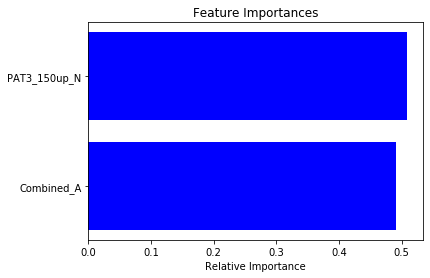

In [48]:
features = X_train.columns
importances = RF_model_CV[2].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## สิ่งที่อาจทำเพิ่ม ถ้ามีเวลามากขึ้น

- เลือก Features ใหม่ๆ มาวิเคราะห์ อาจทำให้ทำนายคะแนนได้แม่นยำขึ้น
- ลองโมเดลอื่นๆ ดู เช่น อาจลอง Train Neural Network ดู 555
- ลองทำนายคะแนนของสถาบันอื่น

## สรุปผลการวิเคราะห์

จากการทำนายด้วยโมเดล Linear Regression พบว่า คะแนนทำนายต่ำสุดเพื่อสอบติด วิศวะ จุฬา TCAS รอบ 3 ปี 2563 โดยใช้ข้อมูลปี 2555-2562 คือ

> ### 19,334 ± 237 คะแนน

ข้อสรุปจากการวิเคราะห์
- คะแนนปีนี้ มีแนวโน้ม **เฟ้อ**มากกว่าทุกปีที่ผ่านมา (สังเกตเบื้องต้นได้จากจำนวนคนทำ PAT1 ได้เกิน 120 ที่เพิ่มขึ้นจากปีก่อนๆ ถึงเท่าตัว)
- คะแนนปีนี้ มีแนวโน้มใกล้เคียงคะแนนปี **2558** และ **2560**
- น้องที่มีคะแนนในช่วง 19,XXX มีสิทธิ์ลุ้นสอบติดนะครับ (แม้แต่หากน้องได้ 18,XXX ก็ควรลองยื่นเป็นอันดับ 1 ดูครับ)
- แต่พี่ขอย้ำอีกทีนะครับว่า คะแนนทำนายนี้ เป็นเพียงคะแนนทำนายเท่านั้น ทำให้อาจมีปัจจัยอื่นที่โมเดลไม่ได้คำนึงถึงครับ

ทั้งนี้ การเลือกคณะ พี่แนะนำให้น้องเลือกด้วยหลักการดังนี้นะครับ

- **อันดับ 1:** เลือกตามความอยากเลยโดยไม่ต้องแคร์คะแนนที่น้องได้ จะได้ไม่คาใจครับ
- **อันดับ 2-3:** คะแนนของน้อง อยู่ในช่วงค่าต่ำสุดที่สอบติดของ 3 ปีย้อนหลัง
- **อันดับ 4-5:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 1500 คะแนน (สเกลเต็ม 30000)
- **อันดับ 6:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 3000 คะแนน (สเกลเต็ม 30000)

และน้องสามารถวิเคราะห์คะแนนและดูสถิติเพิ่มเติม ได้ที่แอพพลิเคชั่น TCASter (https://tcaster.net/) หรือติดตามข่าวสารได้ที่ Facebook Fanpage (https://www.facebook.com/TCASterApp/) ครับ

แล้วก็ เดี๋ยวพี่จะวิเคราะห์คะแนน กสพท ให้ด้วย รอติดตามได้ทาง Instagram ของพี่ ที่ https://www.instagram.com/pgreatondemand นะครับ

ขอให้น้องๆ สอบติดได้ตามที่ตั้งใจไว้นะ :-)

_- พี่เกรท ออนดีมานด์_